## Ch07. 마트 데이터로 피벗된 데이터를 언피벗하기

### 1. 인덱스를 다루는 다양한 함수들

In [10]:
# 실습 준비 코드
import pandas as pd
data = [['이상윤', 70, 'A'], ['천우희', 80, 'A'], 
        ['카리나', 93, 'B'], ['장범준', 92, 'B']]
df1 = pd.DataFrame(data, columns=['이름', '점수', '반'])
df2 = df1.set_index('이름').copy()

> pandas set_index

index를 설정하는 함수(columns에는 적용되지 않는다)

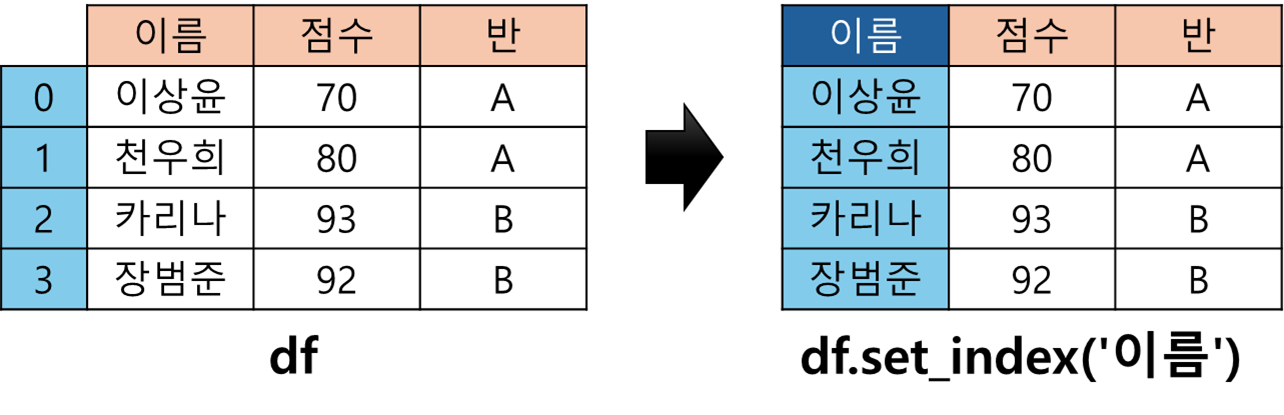


**keys** (열의 레이블 또는 배열)

index로 설정될 대상

**drop** (인수는 bool / 기본 값은 True)

index로 설정한 열을 데이터터 프레임에서는 삭제할지 여부를 결정하는 인자

**append** (인수는 bool / 기본 값은 False)

기존 index에 추가할지 지정하는 인자

<br><br> 

[set_index 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html)

 

In [11]:
# 실습에 쓰일 df1 출력
df1

,이름,점수,반
0,이상윤,70,A
1,천우희,80,A
2,카리나,93,B
3,장범준,92,B


In [12]:
# 이름열을 index로 만들자
df1.set_index('이름')

,점수,반
이름,,
이상윤,70,A
천우희,80,A
카리나,93,B
장범준,92,B


In [13]:
# 반과 이름을 복수로 index로 만들자(멀티 인덱스)
df1.set_index(['반', '이름'])

점수
반 이름     
A 이상윤  70
  천우희  80
B 카리나  93
  장범준  92

In [14]:
# 기존 index에 추가로 이름열을 index로 만들자(append 인자)
df1.set_index('이름', append=True)

,,점수,반
,이름,,
0,이상윤,70,A
1,천우희,80,A
2,카리나,93,B
3,장범준,92,B


> pandas reset_index

기존 index를 index에서 제거하는 함수

index에서만 제거하고 데이터 프레임의 열로 만들 수도 있고 그냥 제거도 가능하다

모든 index가 제거되어 index가 없다면 새로운 RangeIndex가 생성된다

 

 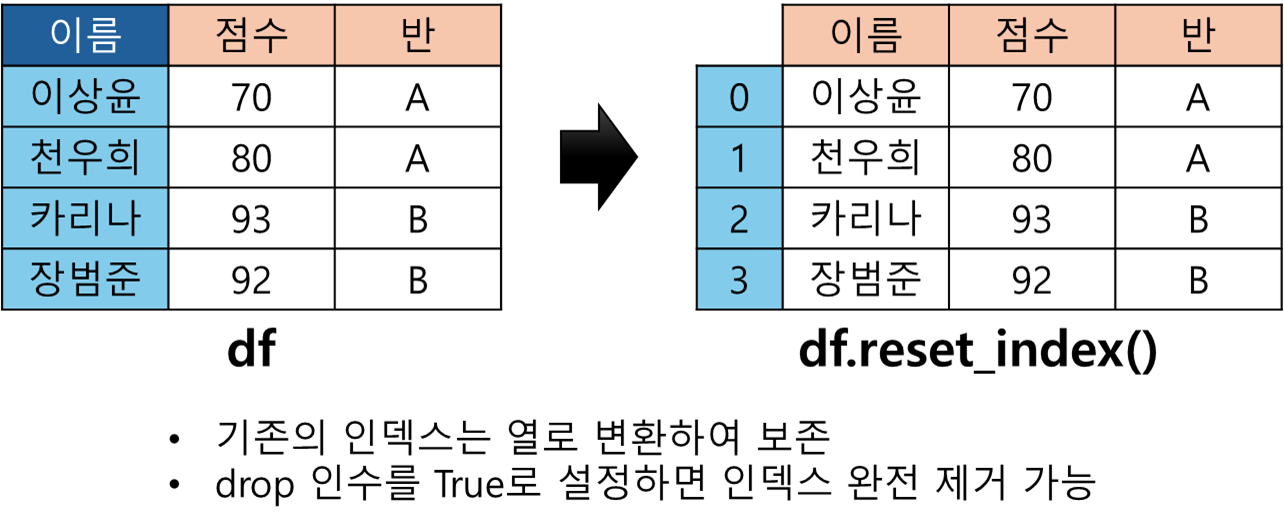

 

**level** (인덱스의 레벨 / 로케이션 혹은 레이블 모두 가능하다 / 기본값은 모든 레벨)

멀티 인덱스에서 리셋할 인덱스의 레벨을 결정한다

 

**drop** (인수는 bool / 기본값은 False)

index에서만 삭제하고 데이터는 데이터프레임의 열로 만들 것인지

열로도 만들지 않고 데이터를 삭제할 것인지 지정하는 인자.

기본값은 열로 만든다 (drop 하지 않는다)


 <br><br>
 
[reset_index 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)


In [44]:
# 실습에 쓰일 df2 출력
df2

,남,여
A,10,30
B,20,40
C,15,35


In [45]:
# df2의 index를 열로 만들자 
df2.reset_index()

,index,남,여
0,A,10,30
1,B,20,40
2,C,15,35


In [46]:
# df2의 index를 삭제하고 새로운 RangeIndex를 부여하자 
df2.reset_index(drop=True)

,남,여
0,10,30
1,20,40
2,15,35


In [47]:
df1[df1['점수'] > 90].reset_index(drop=True)

KeyError: '점수'

> pandas set_axis

주어진 축에 원하는 인덱스를 할당하는 함수

df.index 나 df.columns에 원하는 인덱스를 배정하는 것과 동일하나 함수이기 때문에 원본을 덮어쓰지 않는다


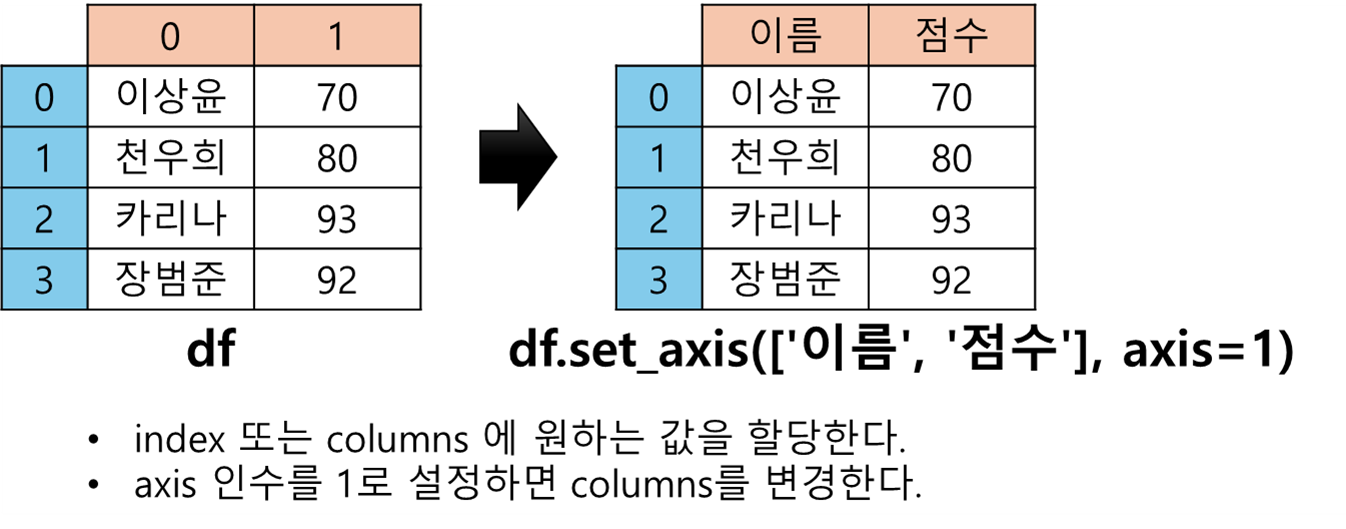


**labels** (배열이나 인덱스)

새로운 인덱스로 만들고 싶은 데이터

 

**axis** (0 or 1 / 기본값은 0)

index를 바꿀 것인지 columns를 바꿀 것인지 지정하는 인자. 기본값은 0이고 index를 할당한다


<br><br>
 
[set_axis 판다스 공식 문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_axis.html)

In [19]:
# df1의 columns를 영어로 바꿔보자
df1.set_axis(['name', 'score', 'class'], axis=1)

,name,score,class
0,이상윤,70,A
1,천우희,80,A
2,카리나,93,B
3,장범준,92,B


In [20]:
# 배정의 방식으로 사용해보자 df1을 복제한 df로 실습하자
df = df1.copy()
df.columns = ['name', 'score', 'class']
df

,name,score,class
0,이상윤,70,A
1,천우희,80,A
2,카리나,93,B
3,장범준,92,B


df.columns 에 배열을 배정한 것과 같은 결과이지만 set_axis는 함수이기에 원본을 덮어쓰지 않는다

> pandas rename

이전에 배운 rename도 인덱스를 다루는 함수이다

In [21]:
# rename으로 이름을 바꿀 때도 lambda 함수를 사용할 수 있다
df1.rename(columns=lambda x: '1학년 ' + x)

,1학년 이름,1학년 점수,1학년 반
0,이상윤,70,A
1,천우희,80,A
2,카리나,93,B
3,장범준,92,B


In [22]:
# df1의 columns 순서를 이름 반 점수로 바꿔보자
df1.reindex(['이름', '반', '점수'], axis=1)

,이름,반,점수
0,이상윤,A,70
1,천우희,A,80
2,카리나,B,93
3,장범준,B,92


In [ ]:
# 인덱싱과의 차이는 무엇일까? # 여기서부터 언피벗 전까지는 지엽적임.
df1[['이름', '반', '점수']]

,이름,반,점수
0,이상윤,A,70
1,천우희,A,80
2,카리나,B,93
3,장범준,B,92


In [24]:
# reindex는 인덱싱과는 달리 기존에 존재하지 않는 레이블도 배열이 가능(값은 NaN)
df1.reindex(['이름', '반', '성별'], axis=1)

,이름,반,성별
0,이상윤,A,NaN
1,천우희,A,NaN
2,카리나,B,NaN
3,장범준,B,NaN


In [25]:
# df1의 columns 순서를 이름 반 점수로 바꿔보자 (columns 인자 사용)
df1.reindex(columns=['이름', '반', '점수'])

,이름,반,점수
0,이상윤,A,70
1,천우희,A,80
2,카리나,B,93
3,장범준,B,92


In [26]:
# index와 columns 모두의 순서를 재배열하고 싶을 때 index와 columns 인자를 사용
df1.reindex(index=[1, 1, 3, 0], columns=['이름', '반', '점수'])

,이름,반,점수
1,천우희,A,80
1,천우희,A,80
3,장범준,B,92
0,이상윤,A,70


## 2. 언피벗(unpivot)을 하는 이유

원시 데이터(raw data)

- 데이터를 쌓고 관리하기 쉽다 
- 데이터의 의미 파악이 어렵다

피벗 테이블(pivot table)

- 데이터 의미 파악이 쉽다 
- 데이터를 쌓고 관리하기 어렵다

→ 그래서 raw data로 관리하고 피벗테이블로 요약해야한다 

그런데 실무에서는 피벗테이블로 데이터를 관리하는 경우가 많다

<br><br>

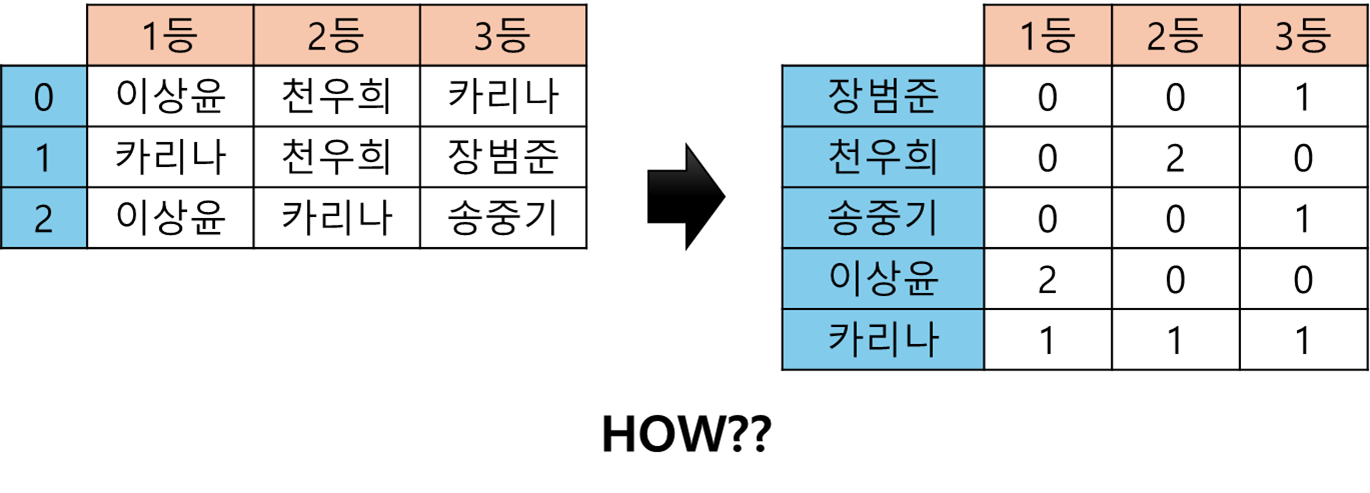

피벗 테이블로 데이터를 관리하면 새로운 피벗테이블 만드는 것이 어렵다

위 예시는 단순한 구조라서 그나마 가능하지만 복잡한 피벗테이블을 다른 복잡한 피벗테이블로 전환하는 것은 정말 쉽지 않다

<br><br>

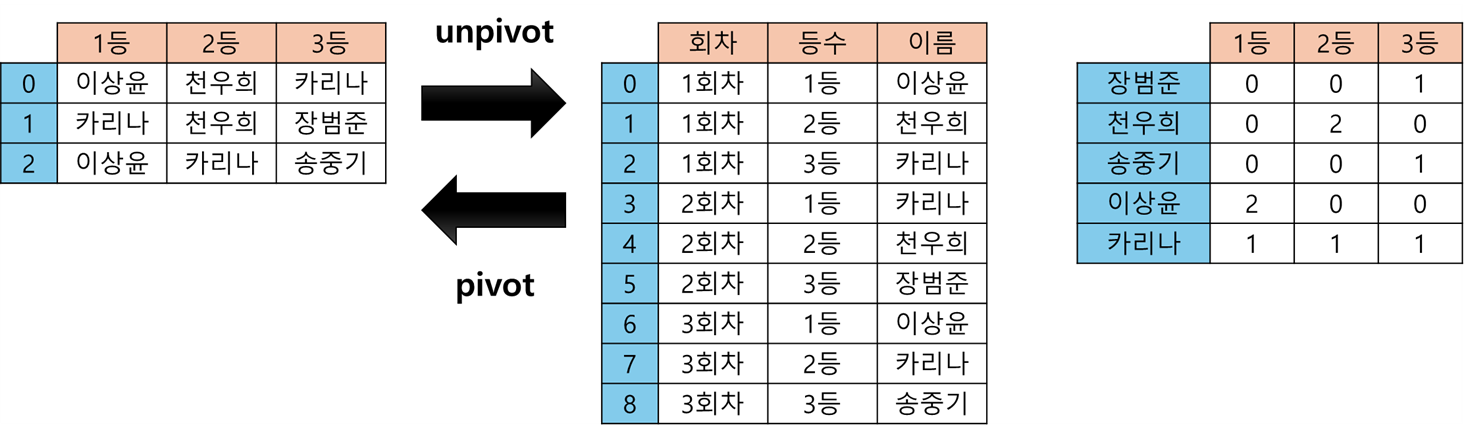

그래서 **unpivot**이 필요하다  

unpivot한 데이터인 가운데 데이터프레임을 우측을 만드는 것은 `pivot_table` 함수로 간단히 가능하다



## 3. stack으로 언피벗하기

**판다스에서 unpivot 하는 두가지 방법**
1. stack 함수와 다른 함수들을 함께 사용하는 방법

 →  stack은 그 자체로 유용한 함수라 unpivot을 위해 함수를 추가적으로 익히지 않아도 된다

2. melt 함수로 하는 방법

 →  melt는 unpivot 전용 함수라 편리하다

**stack & unstack**

인덱스의 구조를 바꾸는 함수

stack은 columns를 index로 보내고 unstack은 index를 columns로 보낸다

<img src=https://i.ibb.co/xLG08Q0/07-02-01.png, width=600> 

> pandas stack

**level** (level의 레이블 혹은 로케이션, 또는 그것들의 리스트 / 기본값은  -1)

columns로 보낼 index의 level을 지정하는 인자. 기본값은 -1이라서 맨 마지막 index를 보낸다

 

**dropna** (인수는 bool / 기본값은 True)

값이 NaN인 행은 생성하지 않고 삭제하는 인자. 기본값은 True

<br><br>


> pandas unstack

 

**level** (level의 레이블 혹은 로케이션, 또는 그것들의 리스트 / 기본값은  -1)

index로 보낼 columns의 level을 지정하는 인자. 기본값은 -1이라서 맨 마지막 index를 보낸다


**fill_value** 

NaN을 대체할 값을 지정하는 인자

<br><br>

[stack 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html)


[unstack 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
 

In [48]:
# 실습 준비 코드
import pandas as pd
data1 = [[10, 20, 30, 40], [15, 25, 35, 45]]
data2 = [[10, 30], [20, 40], [15, 35]]
col1 = pd.MultiIndex.from_product([['남', '여'], ['A반', 'B반']])
df1 = pd.DataFrame(data1, index=['1학년', '2학년'], columns=col1)
df2 = pd.DataFrame(data2, index=list('ABC'), columns=['남', '여'])

**stack 실습하기**

In [49]:
# 실습에 쓰일 df1
df1

남       여    
     A반  B반  A반  B반
1학년  10  20  30  40
2학년  15  25  35  45

In [50]:
# stack으로 df1의 구조 바꾸기
df1.stack()

C:\Users\이창현\AppData\Local\Temp\ipykernel_32572\3517927289.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df1.stack()


남   여
1학년 A반  10  30
    B반  20  40
2학년 A반  15  35
    B반  25  45

In [51]:
# stack으로 level을 지정해 df1의 구조 바꾸기
df1.stack(0)

C:\Users\이창현\AppData\Local\Temp\ipykernel_32572\3006205383.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df1.stack(0)


A반  B반
1학년 남  10  20
    여  30  40
2학년 남  15  25
    여  35  45

In [52]:
# stack으로 level을 복수로 지정하기
df1.stack([0, 1])

C:\Users\이창현\AppData\Local\Temp\ipykernel_32572\2940008835.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df1.stack([0, 1])


1학년  남  A반    10
        B반    20
     여  A반    30
              ..
2학년  남  B반    25
     여  A반    35
        B반    45
Length: 8, dtype: int64

**stack + reset_index로 unpivot하기**

<img src=https://i.ibb.co/8jZ66ZX/07-03-01.png, width=600>

In [53]:
# 실습에 쓰일 df2
df2

,남,여
A,10,30
B,20,40
C,15,35


In [54]:
# df2를 stack으로 unpivot 하기
df2.stack().reset_index()

,level_0,level_1,0
0,A,남,10
1,A,여,30
2,B,남,20
3,B,여,40
4,C,남,15
5,C,여,35


In [55]:
# df2를 stack으로 unpivot 하고 열이름 지정하기
df2.stack().reset_index().set_axis(['반', '성별', '인원수'], axis=1)

,반,성별,인원수
0,A,남,10
1,A,여,30
2,B,남,20
3,B,여,40
4,C,남,15
5,C,여,35


## 4. melt로 언피벗하기

> pandas melt

데이터 프레임을 unpivot 하는 함수

 

<img src=https://i.ibb.co/hR80hbP/07-02-02.png, width=600> 
 

**id_vars** (열의 레이블 혹은 그것들의 리스트)

index처럼 unpivot 하지 않을 열을 지정하는 인자

 

**value_vars** (열의 레이블 혹은 그것들의 리스트)

unpivot할 열을 지정하는 인자

기본값으로 id_vars로 지정되지 않은 모든 열을 value_vars로 지정해 unpivot한다
 

**var_name** (scalar)

unpivot 후 ‘variable’ 열의 레이블을 지정하는 인자

 

**value_name** (scalar/ 기본값은 ‘value’)

unpivot 후 ‘value’ 열의 레이블을 지정하는 인자

 
<br><br>
 
[melt 공식 문서 링크](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)1

In [56]:
# 실습 준비 코드
import pandas as pd
data = [['A', 10, 30], ['B', 20, 40], ['C', 15, 35]]
df = pd.DataFrame(data, columns=['반', '남', '여'])
df

,반,남,여
0,A,10,30
1,B,20,40
2,C,15,35


In [ ]:
# melt로 언피벗
df.melt('여')

,반,variable,value
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [58]:
# 언피벗 후 열 이름 바꾸기 (함수이용)
df.melt('반').set_axis(['반', '성별', '인원수'], axis=1)

,반,성별,인원수
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


In [59]:
# 언피벗 후 열 이름 바꾸기 (melt의 인자 이용)
df.melt('반', var_name='성별', value_name='인원수')

,반,성별,인원수
0,A,남,10
1,B,남,20
2,C,남,15
3,A,여,30
4,B,여,40
5,C,여,35


## 5. 마트 매출 데이터 언피벗해서 집계하기

피벗테이블로 관리된 마트 매출데이터를 unpivot 하여 취합한 뒤 각종 새로운 피벗테이블을 만들어보자

실습을 위해 **엑셀 파일의 다운로드**가 필요하다

In [39]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행 출력의 바뀐 코드
url = './Ch07_unpivot.xlsx'

In [40]:
# 연도별 매출데이터가 담긴 3개의 시트를 unpivot한 뒤 취합한다
years = ['2020년', '2021년', '2022년']
df_ex1 = pd.DataFrame() # for문을 위해 빈 데이터 프레임 선언
for i in years:
  df = pd.read_excel(url, sheet_name=i)
  df = df.melt('제품', var_name='지점', value_name='매출')
  df['연도'] = i # 연도 데이터가 없으니 열만들기
  df_ex1 = pd.concat([df_ex1, df])
df_ex1

FileNotFoundError: [Errno 2] No such file or directory: './Ch07_unpivot.xlsx'

In [ ]:
# 지점구분과 제품구분 시트의 특성을 merge
df_m1 = pd.read_excel(url, sheet_name=3)
df_m2 = pd.read_excel(url, sheet_name=4)
df_ex2 = df_ex1.merge(df_m1, how='left').merge(df_m2, how='left')
df_ex2

In [ ]:
# 연도와 지역별 매출합 (억단위)
(df_ex2
 .pivot_table('매출', index='연도', columns='지역', aggfunc='sum')
 .div(100000000) # div는 나눗셈 연산의 함수형태
 .round(1)) # round는 반올림 하는 함수

그래프를 그리고 싶지만 plot 함수로 그리면 한글이 깨진다

물론 [링크](https://kimpanda.tistory.com/93)를 참조해 한글이 적용되도록 할 수도 있다




그것보다 이번에는 한글이 적용되는 plotly 기반으로 plot 함수를 그려보겠다

In [ ]:
# 판다스 plot의 기반 라이브러리를 plotly로 지정한다
pd.options.plotting.backend = 'plotly'

In [ ]:
# 연도와 지역별 매출합 (억단위) 그래프
(df_ex2
 .pivot_table('매출', index='연도', columns='지역', aggfunc='sum')
 .div(100000000)
 .round(1)
 .plot(kind='bar', labels={'value':'매출(억)'}, barmode='group', 
       height=400, width=600))

In [ ]:
# 지역별 / 직영점과 비직영점의 매출합 (억단위)
(df_ex2
 .pivot_table('매출', index='지역', columns='분류', aggfunc='sum')
 .div(100000000)
 .round(1)
)

In [ ]:
# 지역별와 직영점과 비직영점의 매출합 (억단위) 그래프
(df_ex2
 .pivot_table('매출', index='지역', columns='분류', aggfunc='sum')
 .div(100000000)
 .round(1)
 .plot(kind='bar', labels={'value':'매출(억)'}, barmode='group', 
       height=400, width=600))

In [ ]:
# 연도별 제품분류별(구분열)로 매출합 (억단위)
(df_ex2
 .pivot_table('매출', index='구분', columns='연도', aggfunc='sum')
 .div(100000000).round(1))

In [ ]:
# 연도별 제품분류별(구분열)로 매출합 (억단위) 그래프 - 기타는 제외
(df_ex2[df_ex2['구분'] != '기타']
 .pivot_table('매출', index='구분', columns='연도', aggfunc='sum')
 .div(100000000).round(1)
 .plot(kind='bar', labels={'value':'매출(억)'}, barmode='group', 
       height=400, width=600))

plotly beckend로 그래프를 그릴 때 인자(parameter)는 아래 웹페이지를 참고하라

https://plotly.com/python-api-reference/generated/plotly.express.bar

<br><br>

plotly tutorial 웹페이지 : https://plotly.com/python/

<br><br>

**ploty color palette**

<img src=https://i.ibb.co/0tZRV3w/07-05-01.png, width=600>

In [ ]:
# plotly에서 색상 바꾸기
import plotly.express as px
(df_ex2
 .pivot_table('매출', index='연도', columns='지역', aggfunc='sum')
 .div(100000000)
 .plot(
     kind='bar', 
     color_discrete_sequence=px.colors.qualitative.Set2, # 색깔 바꾸는 인자
     labels={'value':'매출(억)'}, 
     barmode='group', 
     height=400, 
     width=600
     )
 )

판다스가 좀 더 익숙해지면 아래와 같은 코드로 unpivot후 concat한 df_ex1을 얻는 것이 훨씬 간편하다

In [ ]:
# df_ex1을 얻는 효율적인 코드
import pandas as pd
url = './Ch07_unpivot.xlsx'
dfs = pd.read_excel(url, sheet_name=None)
pd.concat([df.melt('제품', var_name='지점', value_name='매출').assign(연도=name) 
              for name, df in list(dfs.items())[:3]])